# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("C:/Users/sambu/Passwords/Passwords.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.5
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.5 BTC is $31774.50
The current value of your 5.3 ETH is $6464.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key_ID = os.getenv("ALPACA_API_KEY")
alpaca_secret_Key = os.getenv("ALPACA_SECRET_KEY")


In [8]:
#cheeck to sese if env file is correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key_ID)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_Key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
 # Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key_ID,
    alpaca_secret_Key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Display Data
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-24 04:00:00+00:00,101.11,101.47,100.995,101.05,7379452,22965,101.093993,AGG
2022-06-24 04:00:00+00:00,381.43,390.09,381.365,390.08,97628636,628275,386.724310,SPY


In [11]:
#Seperate the Tickers
SPY = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

#concentrate the Tickers
df_portfolio = pd.concat([AGG, SPY,], axis=1, keys=["AGG", "SPY",])


In [12]:
#Data Check to make sure its correct
df_portfolio.head()

AGG                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-06-24 04:00:00+00:00  381.43  390.09  381.365  390.08  97628636   

                                                     SPY                   \
                          trade_count       vwap    open    high      low   
timestamp                                                                   
2022-06-24 04:00:00+00:00      628275  386.72431  101.11  101.47  100.995   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-24 04:00:00+00:00  101.05  7379452       22965  101.093993

In [13]:
# Pick AGG and SPY close prices
# fetch the closing prices fromt he DataFrame
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $390.08
Current SPY closing price: $101.05


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5052.50
The current value of your 200 AGG shares is $78016.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
stocks = my_spy_value + my_agg_value

amount = {"amount":[crypto, stocks]}
index = ["crypto","stocks"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount, index=index)

# Display savings DataFrame
display(df_savings)


,amount
crypto,38238.751
stocks,83068.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

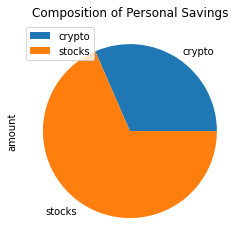

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings["amount"].sum()


In [18]:
#Data Check
savings

121307.251

In [19]:
# Validate saving health
short_goals = emergency_fund - savings
if savings > emergency_fund:
    print(f"congratulations!!! you are on track for your savings goals.  Keep it up!")
elif savings == emergency_fund:
    print(f"Congratulations!!! you met your goal! Keep on going, you can do this!")
else:
    print(f"oh no! you need to save ${short_goals} to reach your goals, next month!  ")

congratulations!!! you are on track for your savings goals.  Keep it up!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
 # Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Get 5 years' worth of historical data for SPY and AGG
#limit set to 10000 so all ticker rows are captured
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 10000
).df


# Display Data
df_stock_data.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG
2016-05-09 04:00:00+00:00,111.11,111.1400,111.0050,111.04,2173463,12416,111.070531,AGG
2016-05-10 04:00:00+00:00,111.06,111.1000,110.9900,111.09,2103822,10989,111.042210,AGG
2016-05-11 04:00:00+00:00,111.06,111.2600,111.0200,111.09,2507055,9310,111.139311,AGG
2016-05-12 04:00:00+00:00,110.92,111.1000,110.9200,110.99,1938846,8182,111.018576,AGG


In [22]:
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

In [23]:
# Reorganize the DataFrame
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
MC_30_year.portfolio_data.tail()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2021-04-26 04:00:00+00:00  114.74  114.8015  114.65  114.65  3480337   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.37  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.20  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.09  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.33  114.49  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2021-04-26 04:00:00+00:00       13521  114.706244    -0.000871  417.42   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.97   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.84   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.38   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.67   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.61  52076360      295872   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.52  50324187      296302   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.40  50692843      330050   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.06  77056617      443399   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.30  84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2021-04-26 04:00:00+00:00  417.505200     0.002088  
2021-04-27 04:00:00+00:00  417.481280    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.825111     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative return
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998943,0.995155,0.998137,1.005066,0.995762,1.010362,1.000112,1.004528,1.004743,1.012518,...,1.000320,0.994422,0.996403,1.000713,1.005790,1.005901,1.005374,1.003438,0.993393,0.988196
2,0.993307,1.002758,0.995810,1.012556,0.993058,1.018709,1.002046,1.008553,0.997659,1.021668,...,1.000316,0.998608,0.997300,1.005476,0.979970,0.999976,1.023528,1.008942,0.996802,0.989737
3,0.990337,1.022066,1.004923,1.017116,0.991233,1.010490,1.001518,1.004952,1.006088,1.021199,...,1.007112,0.997104,0.998462,1.004216,0.979888,0.994690,1.025256,1.024784,0.993868,0.989171
4,0.989077,1.023877,1.008766,1.023847,1.002208,1.012156,0.992281,1.002214,0.997102,1.025406,...,1.011817,1.003811,1.008738,1.011873,0.988388,0.985602,1.036534,1.014624,0.993843,0.987153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.443303,16.790868,5.369329,10.390359,26.463720,6.522439,7.644340,6.756473,6.024550,8.440441,...,13.581983,25.194692,63.012169,69.256750,6.624158,11.223654,16.260597,5.429976,12.360267,19.485073
7557,10.382277,16.763732,5.424782,10.417200,26.331904,6.502283,7.674903,6.719153,6.022380,8.496883,...,13.615988,25.187982,63.779683,68.684785,6.638715,11.344583,16.400140,5.466252,12.367343,19.704730
7558,10.329138,16.737311,5.427848,10.449738,26.485790,6.519523,7.619096,6.695000,6.031466,8.421944,...,13.559112,25.300876,63.171025,69.346519,6.580205,11.307379,16.695822,5.442187,12.370685,19.810872
7559,10.427875,16.869063,5.435940,10.590268,26.413073,6.511612,7.550873,6.669052,6.102803,8.279393,...,13.524673,25.385796,63.351283,69.475906,6.577947,11.272494,16.682443,5.531751,12.418833,19.966599


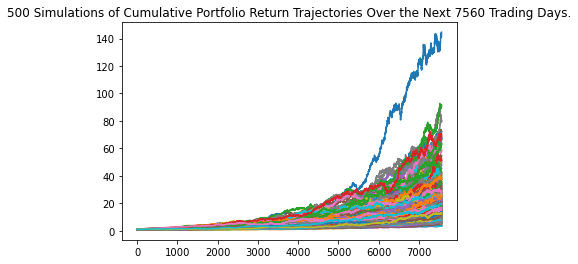

In [27]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

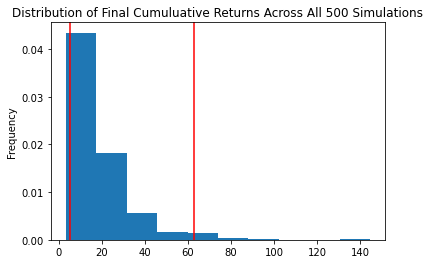

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
table = MC_30_year.summarize_cumulative_return()

# Print summary statistics
table

count           500.000000
mean             18.691403
std              14.605351
min               3.243076
25%               9.280949
50%              14.665272
75%              23.108894
max             144.592113
95% CI Lower      5.034766
95% CI Upper     62.752810
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(table[8]*initial_investment,2)
ci_upper = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100695.32 and $1255056.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(table[8]*initial_investment,2)
ci_upper = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $151042.98 and $1882584.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")